In [34]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology('planck18')

pplib.imports()
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'
DRAFTPATH = '/Users/cosinga/overleaf/hi_cosmo/figures/'

In [35]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/2-10_pkdatasort.pkl', 'rb'))
print(ds.getAttrs())

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.axisLabelArgs('both', fontsize = 16)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center' , va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])

ds.setOrder('space', ['real', 'redshift', 'rsd'])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
# ds.displayAs('color', ['blue', 'red', 'resolved'], 
#              ['HI $\\times$ Blue Bias', 'HI $\\times$ Red Bias', 'HI $\\times$ Galaxy Bias'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])

ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])

ds.setXLabel(pplib.wnum())
ds.getAttrVals('post_process')

['path', 'result_type', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'map', 'model', 'HI_fieldname', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


['no key found', 'theory_bias', 'obs_bias', 'corr_coef']

In [36]:
from figrid.data_container import DataContainer
ptlip = {'fieldname':'ptl', 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'ptl_species':'ptl',
         'mas':'CICW', 'path':'fiducial', 'simname':'tng100'}
galip = {'color_cut':'None', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'axis':0, 'grid_resolution':800,
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': 'resolved', 'fieldname':'galaxy',
     'path':'fiducial', 'simname':'tng100'}
resolved_biases = []
for s in ds.getAttrVals('snapshot'):
    for rss in ['real', 'redshift']:
        
        ptlip['snapshot'] = s
        galip['snapshot'] = s
        ptlip['space'] = rss
        galip['space'] = rss
        ptls = ds.getMatching(ptlip)
        gals = ds.getMatching(galip)
        if len(ptls) > 1:
            ds.printMatching(ptlip)

        if len(gals) > 1:
            ds.printMatching(galip)

        xdata = ptls[0].getData()[0]
        ydata = gals[0].getData()[1]/ ptls[0].getData()[1]
        ydata = np.sqrt(ydata)
        dc = DataContainer([xdata, ydata])
        dc.update(ptlip)
        dc.update(galip)
        dc.update({'censat':'both'})
        dc.add('post_process', 'obs_bias')
        dc.add('is_auto', False)
        dc.add('denominator', 'ptl')
        dc.add('numerator', 'galaxy')
        resolved_biases.append(dc)


ds.extend(resolved_biases)
    

In [38]:
BHI_0 = [0.78, 1.11, 1.43]
BRED = [1.88, 2.23, 2.78]
BBLUE = [1.1, 1.64, 1.99]
BGAL = []
zs = np.linspace(0, 1, 100)
d_plus = cosmo.growthFactor(zs)


bhi_passive = 1 + ((BHI_0[0] - 1) / d_plus)
bred_passive = 1 + ((BRED[0] - 1) / d_plus)
bblue_passive = 1 + ((BBLUE[0] - 1) / d_plus)

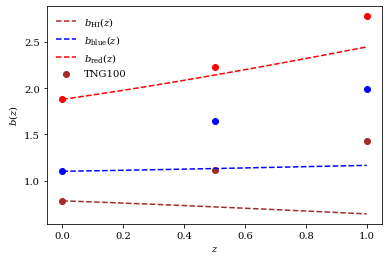

In [39]:
plt.plot(zs, bhi_passive, label = '$b_{\\mathrm{HI}} (z)$', linestyle = 'dashed', color = 'brown')
plt.plot(zs, bblue_passive, label = '$b_{\\mathrm{blue}} (z)$', linestyle = 'dashed', color = 'blue')
plt.plot(zs, bred_passive, label = '$b_{\\mathrm{red}} (z)$', linestyle = 'dashed', color = 'red')

snapshot_zs = [0, 0.5, 1]
plt.scatter(snapshot_zs, BHI_0, color = 'brown', label = 'TNG100')
plt.scatter(snapshot_zs, BRED, color = 'red')
plt.scatter(snapshot_zs, BBLUE, color = 'blue')
plt.legend(loc = 'upper left', frameon = False)
plt.ylabel('$b (z)$')
plt.xlabel('$z$')

plt.savefig(DRAFTPATH + "passive_evo_placeholder.png")